In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import rhine_myd_func as func

In [4]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
# import functions (and packages) from R
r_time_series = robjects.r('ts')


In [5]:
SPEI_package = importr('SPEI')
r_spei_function = robjects.r['spei']

### notes

- copy time axes, because there are differences `TSpet['time'] = TSpr.time`
- first calculate reference climate

### Here we calculate **MONTLY** integrated timeseries for the Rhine region 

In [11]:
var='pr'
freq='Amon'
timeslice='PD'
i='01'
j='0'
diri='/perm/nklm/Px_drought/testing/LENTIS/'

ds, ens_member = open_one_LENTIS(var, freq, timeslice, i, j, diri, plev=None)

In [12]:
TSpr, box_seasons = calc_boxstat(ds, 'pr', area='rhine')

In [13]:
var='pet'
freq='Amon'
timeslice='PD'
i='01'
j='0'
diri='/perm/nklm/Px_drought/testing/LENTIS/'

ds, ens_member = open_one_LENTIS(var, freq, timeslice, i, j, diri, plev=None)

In [14]:
TSpet, box_seasons = calc_boxstat(ds, 'pet_pm_asce', area='rhine')

In [15]:
spei_scale = [1]

In [16]:
TSpet['time'] = TSpr.time

In [17]:
r_ts_wb = r_time_series(robjects.FloatVector((TSpr*60*60*24) - TSpet), start = robjects.IntVector([ds.time.dt.year[0].values, ds.time.dt.month[0].values]), frequency = 12)

In [18]:
r_wb_values=np.array(r_ts_wb)

In [19]:
np.shape(r_wb_values)

(120,)

In [20]:
da_spei = np.full(TSpr.shape,np.nan)

In [21]:
r_spei = r_spei_function(r_ts_wb, scale=spei_scale[0], na_rm=True, ref_start=robjects.IntVector([func.spei_ref[0], 1]), ref_end=robjects.IntVector([func.spei_ref[1], 12]), distibution='log-Logistic')
            

[1] "Calculating the Standardized Precipitation Evapotranspiration Index (SPEI) at a time scale of 1. Using kernel type 'rectangular', with 0 shift. Fitting the data to a log-Logistic distribution. Using the ub-pwm parameter fitting method. Missing values (`NA`) will not be considered in the calculation. Using a user-specified reference period. Input type is tsvector. Time series spanning Jan 2000 to Dec 2009, with frequency = 12."


In [22]:
r_spei_values = pandas2ri.ri2py_vector(r_spei.rx2('fitted'))

Text(0.5, 1.0, 'SPEI1 in the Rhine basin based on monthly values')

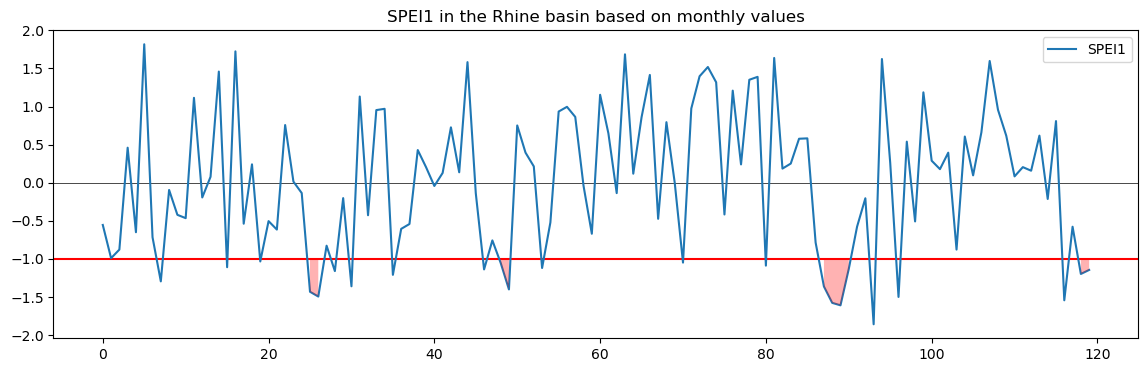

In [23]:
fig,ax = plt.subplots(1, 1,figsize=(14,4))

plt.axhline(y=-1, color='r', linestyle='-')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.plot(r_spei_values, label='SPEI1')

# idx = np.argwhere(np.isclose(r_spei_values, -1, atol=0.1)).reshape(-1)

# for i in range(0,np.shape(idx)[0]):
#     plt.axvline(x=idx[i]) #x3[idx], y2_new[idx], 'ro')

xaxis = range(0,np.shape(r_spei_values)[0])
plt.fill_between(xaxis,-1,r_spei_values,where =  (r_spei_values <= -1), color='r',alpha=0.3,linewidth=0,zorder=5)


plt.legend()
plt.title('SPEI1 in the Rhine basin based on monthly values')

Text(0.5, 1.0, 'diff SPEI1 in the Rhine basin based on monthly values')

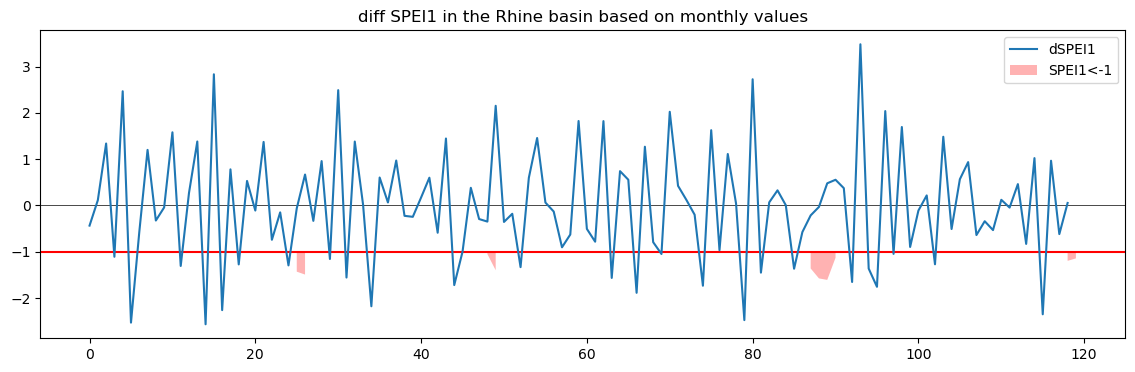

In [97]:
diff_r_spei_values = np.diff(r_spei_values)

fig,ax = plt.subplots(1, 1,figsize=(14,4))

plt.axhline(y=-1, color='r', linestyle='-')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.plot(diff_r_spei_values, label='dSPEI1')

# idx = np.argwhere(np.isclose(r_spei_values, -1, atol=0.1)).reshape(-1)

# for i in range(0,np.shape(idx)[0]):
#     plt.axvline(x=idx[i]) #x3[idx], y2_new[idx], 'ro')

xaxis = range(0,np.shape(r_spei_values)[0])
plt.fill_between(xaxis,-1,r_spei_values,where =  (r_spei_values <= -1), color='r',alpha=0.3,linewidth=0,zorder=5, label='SPEI1<-1')


plt.legend()
plt.title('diff SPEI1 in the Rhine basin based on monthly values')

Text(0.5, 1.0, '2nd order diff SPEI1 in the Rhine basin based on monthly values')

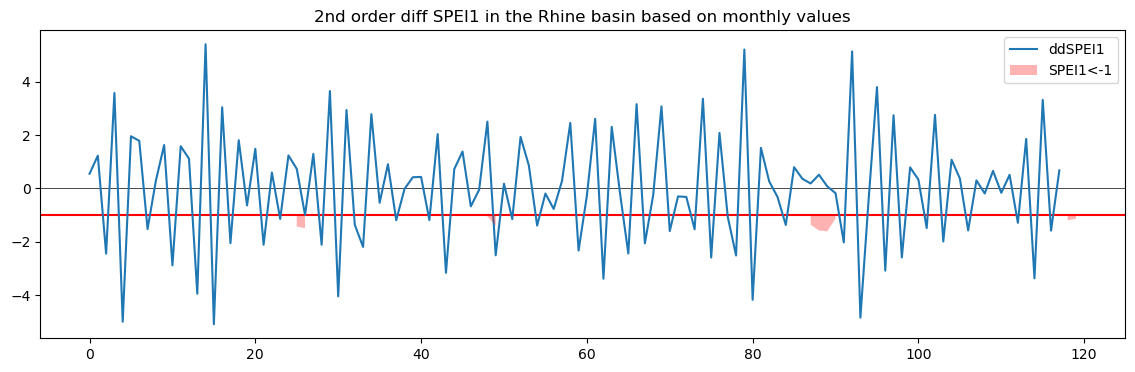

In [98]:
diff_diff_r_spei_values = np.diff(np.diff(r_spei_values))

fig,ax = plt.subplots(1, 1,figsize=(14,4))

plt.axhline(y=-1, color='r', linestyle='-')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.plot(diff_diff_r_spei_values, label='ddSPEI1')

# idx = np.argwhere(np.isclose(r_spei_values, -1, atol=0.1)).reshape(-1)

# for i in range(0,np.shape(idx)[0]):
#     plt.axvline(x=idx[i]) #x3[idx], y2_new[idx], 'ro')

xaxis = range(0,np.shape(r_spei_values)[0])
plt.fill_between(xaxis,-1,r_spei_values,where =  (r_spei_values <= -1), color='r',alpha=0.3,linewidth=0,zorder=5, label='SPEI1<-1')


plt.legend()
plt.title('2nd order diff SPEI1 in the Rhine basin based on monthly values')

## now do daily

In [10]:
var='pr'
freq='day'
timeslice='PD'
i='01'
j='0'
diri='/perm/nklm/Px_drought/testing/LENTIS/'

ds, ens_member = open_one_LENTIS(var, freq, timeslice, i, j, diri, plev=None)

In [11]:
dayTSpr, box_seasons = calc_boxstat(ds, 'pr', area='rhine')

In [12]:
var='pet'
freq='day'
timeslice='PD'
i='01'
j='0'
diri='/perm/nklm/Px_drought/testing/LENTIS/'

ds, ens_member = open_one_LENTIS(var, freq, timeslice, i, j, diri, plev=None)

In [13]:
dayTSpet, box_seasons = calc_boxstat(ds, 'pet_pm_asce', area='rhine')

In [14]:
dayTSpet['time'] = dayTSpr.time

In [15]:
dayTSwb=((dayTSpr*60*60*24) - dayTSpet)

In [16]:
r_wb_day = r_time_series(robjects.FloatVector(dayTSwb), start = robjects.IntVector([ds.time.dt.year[0].values, ds.time.dt.month[0].values]), frequency = 365)


In [75]:
r_spei_day = r_spei_function(r_wb_day, scale=10, na_rm=True, distribution='log-Logistic',verbose=False) #.rx2('coefficients')

In [76]:
# check that leap days are out
np.shape(r_wb_day)

(3650,)

In [77]:
r_spei_values_day = pandas2ri.ri2py_vector(r_spei_day.rx2('fitted'))

Text(0.5, 1.0, 'SPEId10 in the Rhine basin based on daily values')

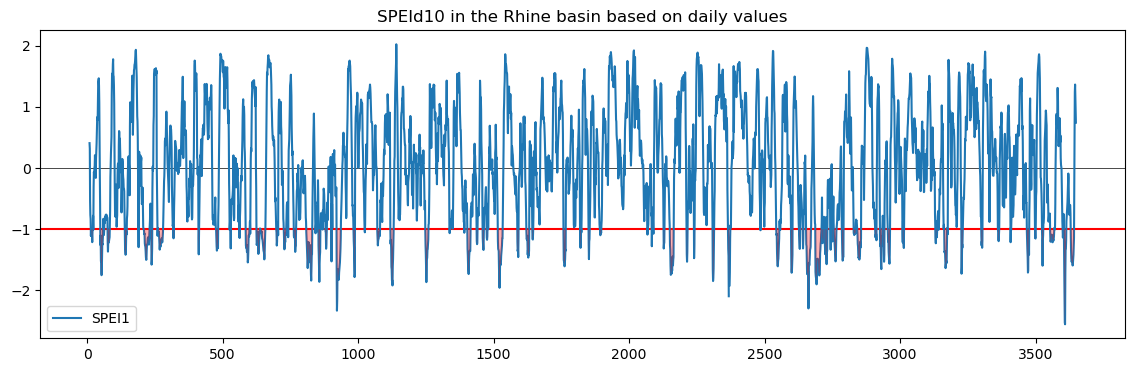

In [78]:
fig,ax = plt.subplots(1, 1,figsize=(14,4))

plt.axhline(y=-1, color='r', linestyle='-')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.plot(r_spei_values_day, label='SPEI1')

# idx = np.argwhere(np.isclose(r_spei_values, -1, atol=0.1)).reshape(-1)

# for i in range(0,np.shape(idx)[0]):
#     plt.axvline(x=idx[i]) #x3[idx], y2_new[idx], 'ro')

xaxis = range(0,np.shape(r_spei_values_day)[0])
plt.fill_between(xaxis,-1,r_spei_values_day,where =  (r_spei_values_day <= -1), color='r',alpha=0.3,linewidth=0,zorder=5)


plt.legend()
plt.title('SPEId10 in the Rhine basin based on daily values')

Text(0.5, 1.0, 'SPEI1 in the Rhine basin based on daily values')

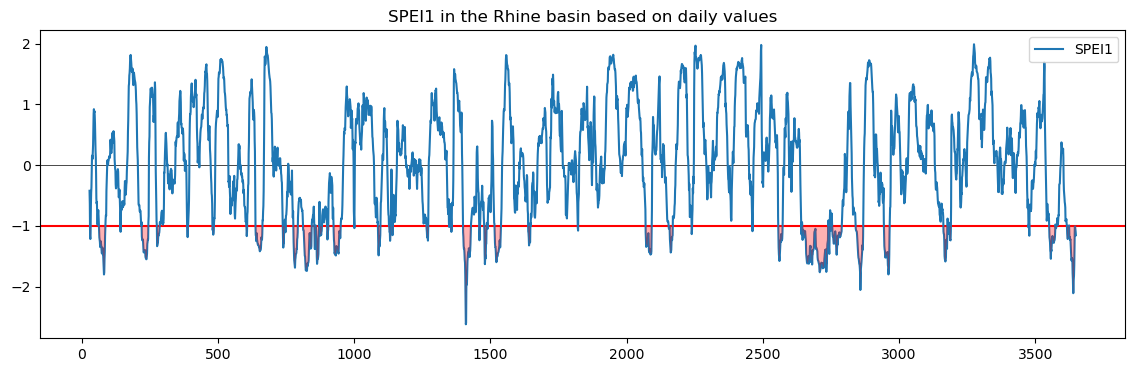

In [33]:
fig,ax = plt.subplots(1, 1,figsize=(14,4))

plt.axhline(y=-1, color='r', linestyle='-')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.plot(r_spei_values_day, label='SPEI1')

# idx = np.argwhere(np.isclose(r_spei_values, -1, atol=0.1)).reshape(-1)

# for i in range(0,np.shape(idx)[0]):
#     plt.axvline(x=idx[i]) #x3[idx], y2_new[idx], 'ro')

xaxis = range(0,np.shape(r_spei_values_day)[0])
plt.fill_between(xaxis,-1,r_spei_values_day,where =  (r_spei_values_day <= -1), color='r',alpha=0.3,linewidth=0,zorder=5)


plt.legend()
plt.title('SPEI1 in the Rhine basin based on daily values')

Text(0.5, 1.0, 'diff SPEId5 in the Rhine basin based on daily values')

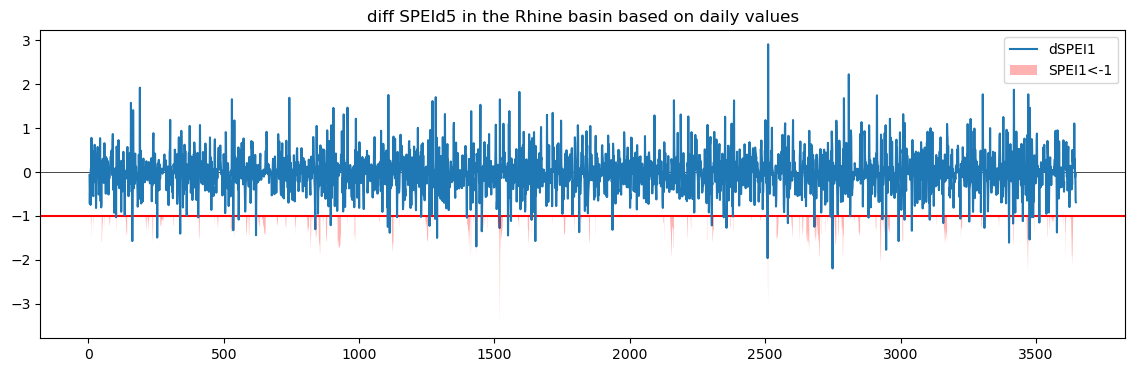

In [21]:
diff_r_spei_values_day = np.diff(r_spei_values_day)

fig,ax = plt.subplots(1, 1,figsize=(14,4))

plt.axhline(y=-1, color='r', linestyle='-')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.plot(diff_r_spei_values_day, label='dSPEI1')

# idx = np.argwhere(np.isclose(r_spei_values, -1, atol=0.1)).reshape(-1)

# for i in range(0,np.shape(idx)[0]):
#     plt.axvline(x=idx[i]) #x3[idx], y2_new[idx], 'ro')

xaxis = range(0,np.shape(r_spei_values_day)[0])
plt.fill_between(xaxis,-1,r_spei_values_day,where =  (r_spei_values_day <= -1), color='r',alpha=0.3,linewidth=0,zorder=5, label='SPEI1<-1')


plt.legend()
plt.title('diff SPEId5 in the Rhine basin based on daily values')

Text(0.5, 1.0, 'SPEId5 & 1st order time deriv. dSPEId5 rol.sum window d-N')

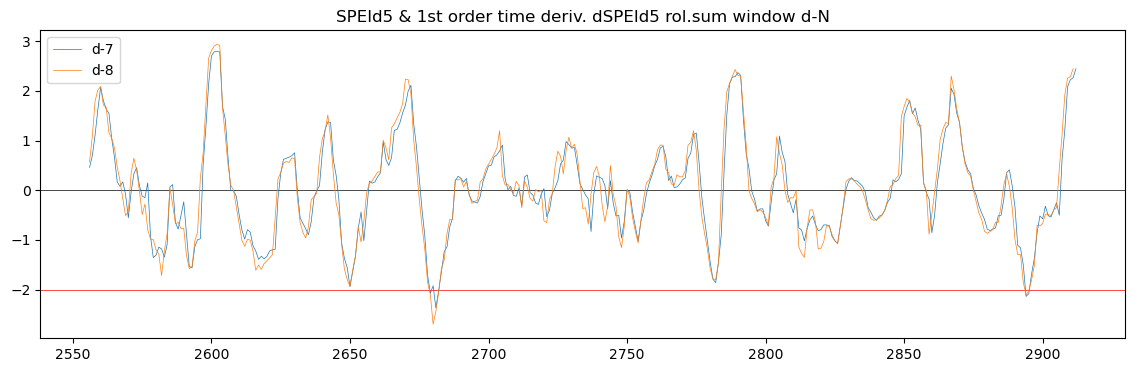

In [80]:
fig,ax = plt.subplots(1, 1,figsize=(14,4))

start = 1+(365*7)
end = 365+(365*7)
xaxis = range(start,end)
# plt.plot(xaxis,r_spei_values_day[start:end], label='SPEI1',linewidth=5)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axhline(y=-2, color='r', linestyle='-', linewidth=0.5)
# plt.fill_between(xaxis,-1,r_spei_values_day[start:end],where =  (r_spei_values_day[start:end] <= -1), color='r',alpha=0.3,linewidth=0,zorder=5, label='SPEI1<-1')


# for i in np.arange(1,10,1):
for i in np.arange(7,9,1):
    N=i
    plt.plot(xaxis[:-i],pd.Series(np.diff(r_spei_values_day[start:end])).rolling(window=N).sum().iloc[N-1:].values, label=f'd-{N}',linewidth=0.5)
    
# plt.plot(xaxis,r_spei_values_day[start:end], label='SPEI1',linewidth=3)
plt.legend()
plt.title('SPEId5 & 1st order time deriv. dSPEId5 rol.sum window d-N')

In [82]:
np.sum(pd.Series(np.diff(r_spei_values_day[start:end])).rolling(window=N).sum() < -2 )

6

Text(0.5, 1.0, 'SPEId5 & 1st order time deriv. dSPEId5 rol.sum window d-N')

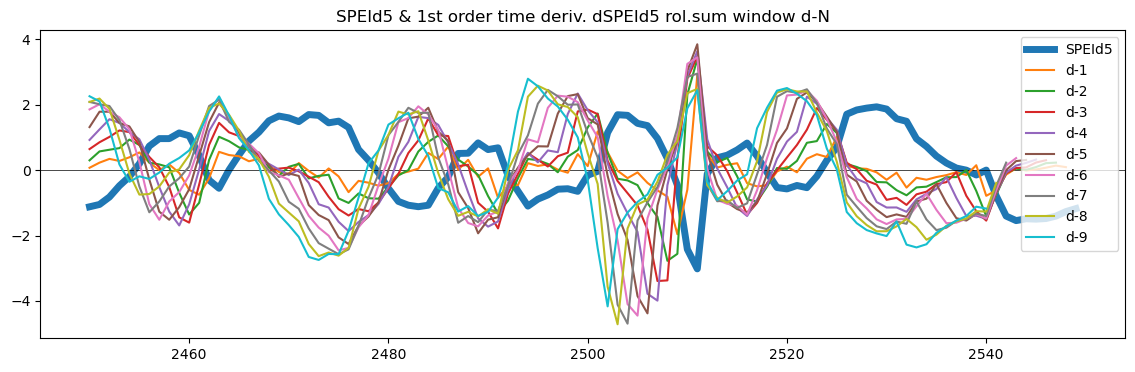

In [47]:
fig,ax = plt.subplots(1, 1,figsize=(14,4))

start = 2450
end = 2550
xaxis = range(start,end)
plt.plot(xaxis,r_spei_values_day[start:end], label='SPEId5',linewidth=5)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
# plt.fill_between(xaxis,-1,r_spei_values_day[start:end],where =  (r_spei_values_day[start:end] <= -1), color='r',alpha=0.3,linewidth=0,zorder=5, label='SPEI1<-1')


for i in np.arange(1,10,1):
    N=i
    plt.plot(xaxis[:-i],pd.Series(np.diff(r_spei_values_day[start:end])).rolling(window=N).sum().iloc[N-1:].values, label=f'd-{N}')
    
# plt.plot(xaxis,r_spei_values_day[start:end], label='SPEId5',linewidth=3)
plt.legend()
plt.title('SPEId5 & 1st order time deriv. dSPEId5 rol.sum window d-N')

Text(0.5, 1.0, 'SPEId5 & 1st order time deriv. dSPEId5 rol.sum window d-N')

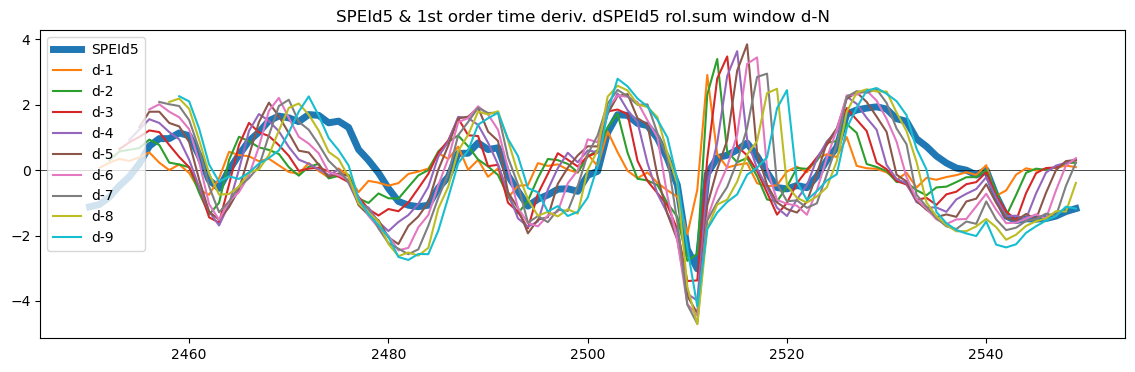

In [49]:
fig,ax = plt.subplots(1, 1,figsize=(14,4))

start = 2450
end = 2550
xaxis = range(start,end)
plt.plot(xaxis,r_spei_values_day[start:end], label='SPEId5',linewidth=5)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
# plt.fill_between(xaxis,-1,r_spei_values_day[start:end],where =  (r_spei_values_day[start:end] <= -1), color='r',alpha=0.3,linewidth=0,zorder=5, label='SPEI1<-1')


for i in np.arange(1,10,1):
    N=i
    plt.plot(xaxis[i:],pd.Series(np.diff(r_spei_values_day[start:end])).rolling(window=N).sum().iloc[N-1:].values, label=f'd-{N}')
    
# plt.plot(xaxis,r_spei_values_day[start:end], label='SPEI1',linewidth=3)
plt.legend()
plt.title('SPEId5 & 1st order time deriv. dSPEId5 rol.sum window d-N')

Text(0.5, 1.0, 'SPEId5 & 2nd order time deriv. ddSPEId5 rol.sum window d-N')

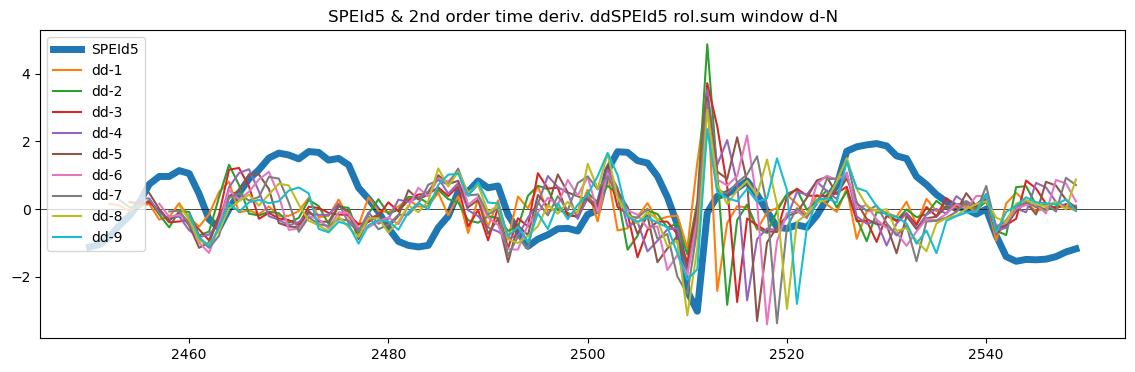

In [51]:
fig,ax = plt.subplots(1, 1,figsize=(14,4))

start = 2450
end = 2550
xaxis = range(start,end)
plt.plot(xaxis,r_spei_values_day[start:end], label='SPEId5',linewidth=5)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
# plt.fill_between(xaxis,-1,r_spei_values_day[start:end],where =  (r_spei_values_day[start:end] <= -1), color='r',alpha=0.3,linewidth=0,zorder=5, label='SPEI1<-1')


for i in np.arange(1,10,1):
    N=i
    plt.plot(xaxis[1+i:],pd.Series(np.diff(np.diff(r_spei_values_day[start:end]))).rolling(window=N).sum().iloc[N-1:].values, label=f'dd-{N}')
    
# plt.plot(xaxis,r_spei_values_day[start:end], label='SPEI1',linewidth=3)
plt.legend()
plt.title('SPEId5 & 2nd order time deriv. ddSPEId5 rol.sum window d-N')

Text(0.5, 1.0, 'SPEI1 & 2nd order time deriv. ddSPEI1 rol.sum window dd-N')

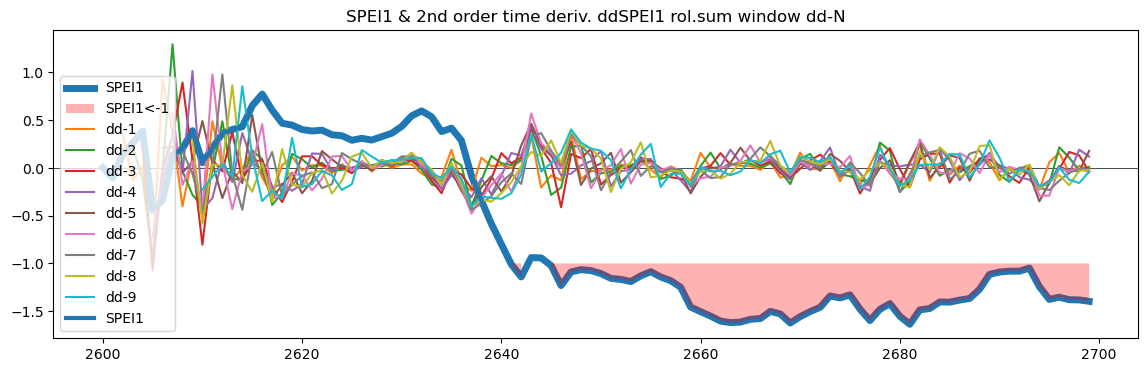

In [127]:
fig,ax = plt.subplots(1, 1,figsize=(14,4))

start = 2600
end = 2700
xaxis = range(start,end)
plt.plot(xaxis,r_spei_values_day[start:end], label='SPEI1',linewidth=5)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.fill_between(xaxis,-1,r_spei_values_day[start:end],where =  (r_spei_values_day[start:end] <= -1), color='r',alpha=0.3,linewidth=0,zorder=5, label='SPEI1<-1')


for i in np.arange(1,10,1):
    N=i
    plt.plot(xaxis[1+i:],pd.Series(np.diff(np.diff(r_spei_values_day[start:end]))).rolling(window=N).sum().iloc[N-1:].values, label=f'dd-{N}')
    
plt.plot(xaxis,r_spei_values_day[start:end], label='SPEI1',linewidth=3)
plt.legend()
plt.title('SPEI1 & 2nd order time deriv. ddSPEI1 rol.sum window dd-N')


Text(0.5, 1.0, '2e order diff SPEI1 in the Rhine basin based on daily values')

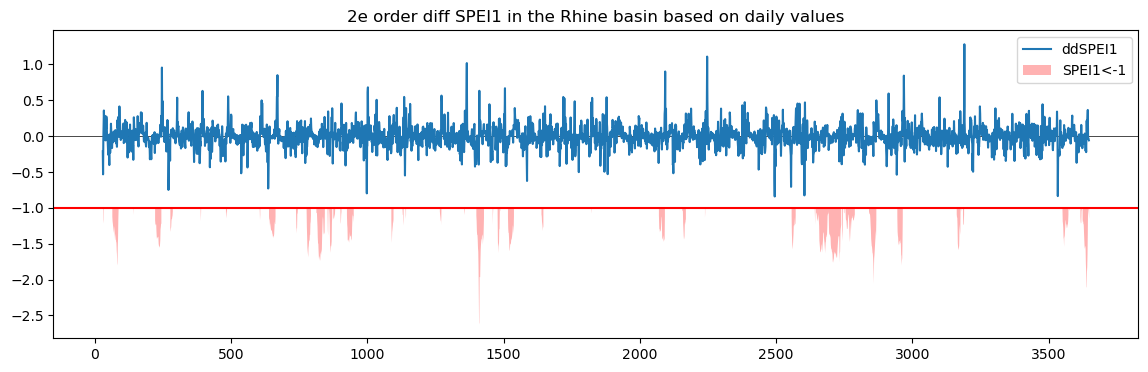

In [96]:
diff_diff_r_spei_values_day = np.diff(np.diff(r_spei_values_day))

fig,ax = plt.subplots(1, 1,figsize=(14,4))

plt.axhline(y=-1, color='r', linestyle='-')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.plot(diff_r_spei_values_day, label='ddSPEI1')

# idx = np.argwhere(np.isclose(r_spei_values, -1, atol=0.1)).reshape(-1)

# for i in range(0,np.shape(idx)[0]):
#     plt.axvline(x=idx[i]) #x3[idx], y2_new[idx], 'ro')

xaxis = range(0,np.shape(r_spei_values_day)[0])
plt.fill_between(xaxis,-1,r_spei_values_day,where =  (r_spei_values_day <= -1), color='r',alpha=0.3,linewidth=0,zorder=5, label='SPEI1<-1')


plt.legend()
plt.title('2e order diff SPEI1 in the Rhine basin based on daily values')

### test for SPEI length 

/perm/nklm/mambaforge/lib/python3.10/site-packages/numpy/lib/function_base.py:1447: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


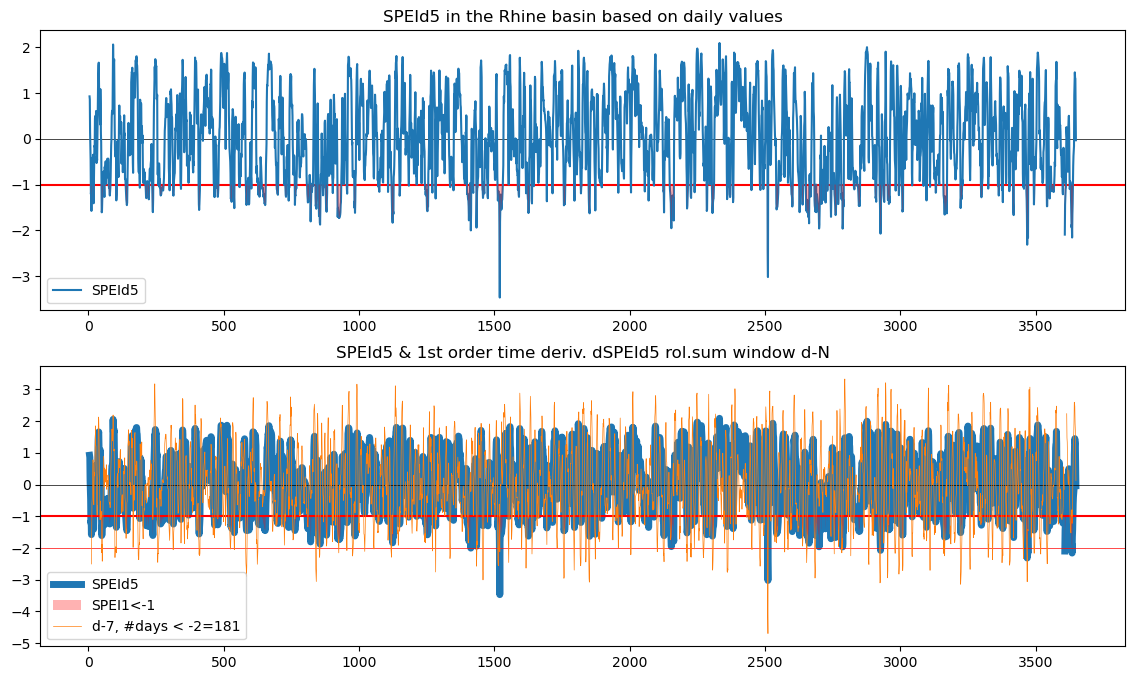

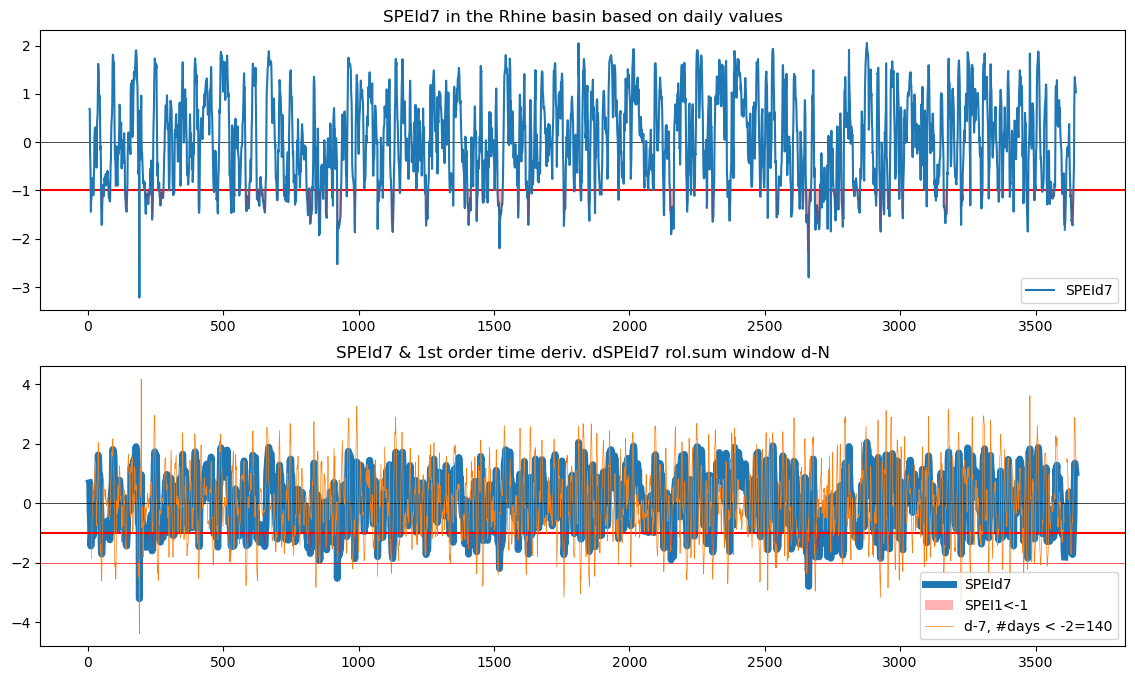

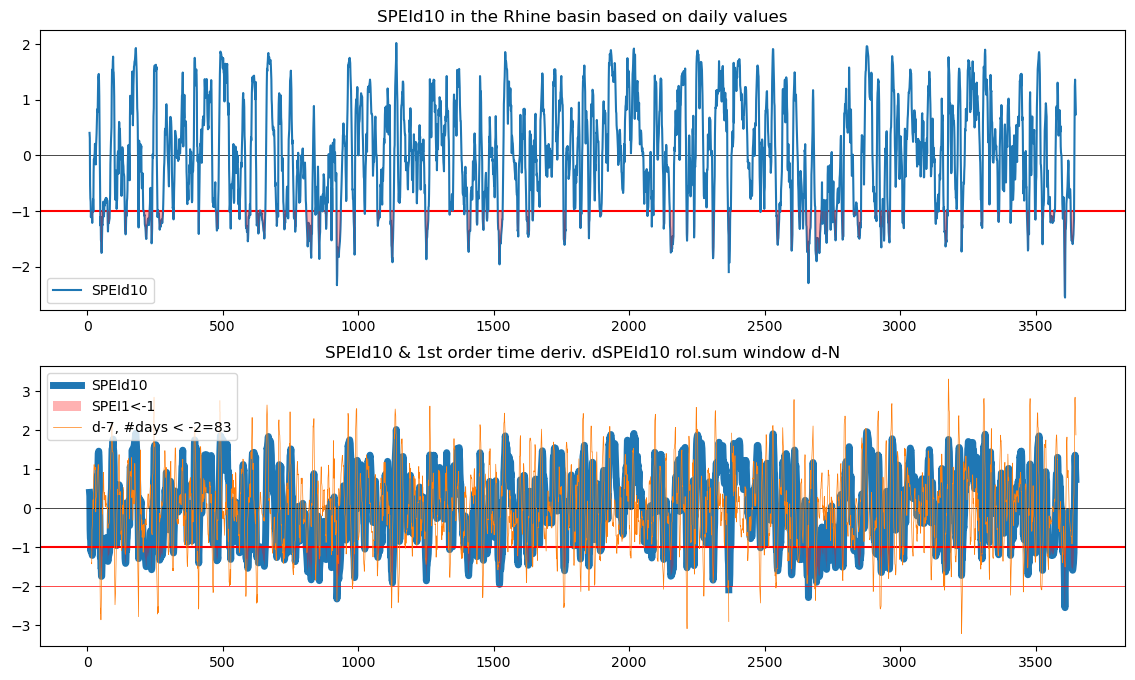

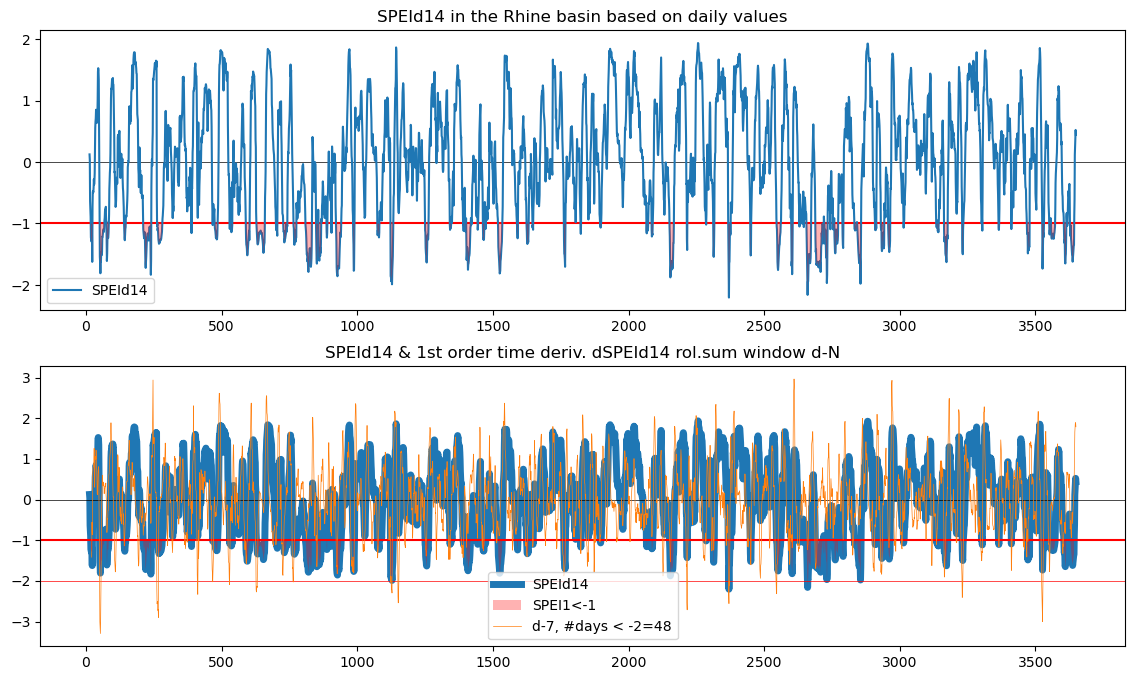

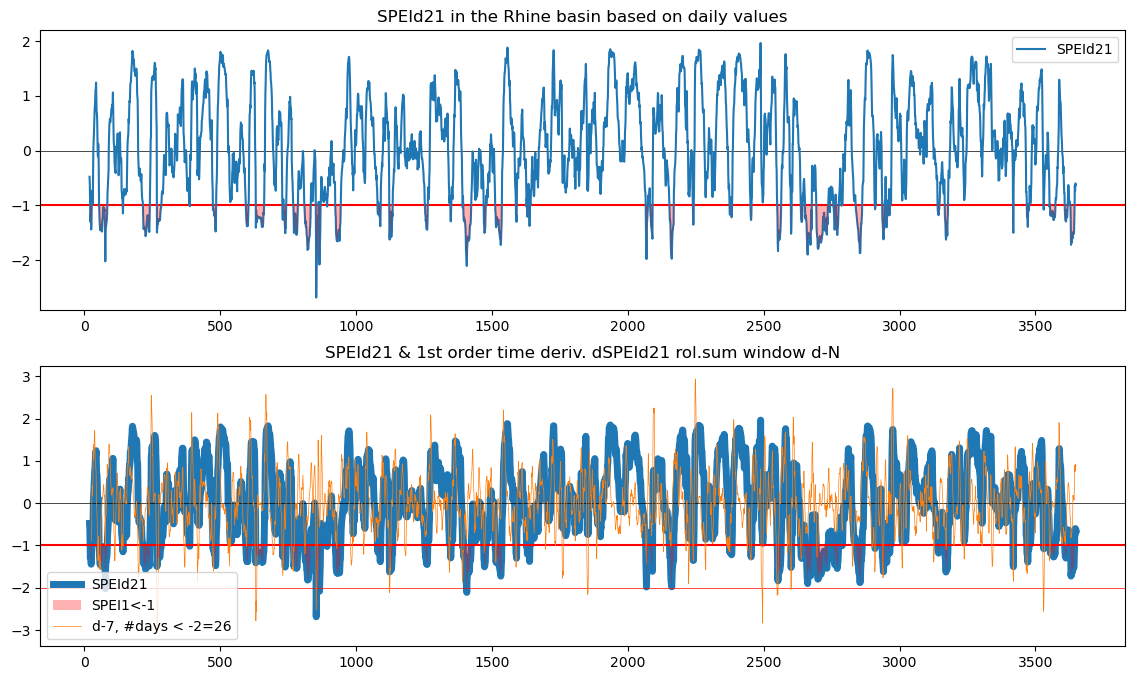

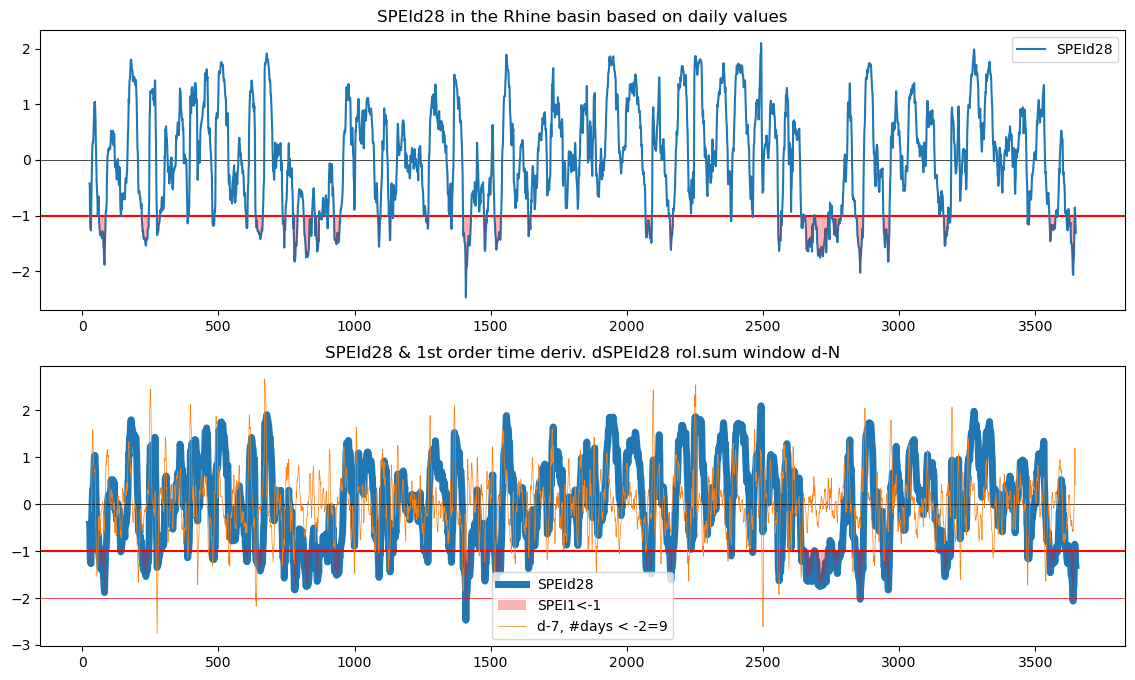

In [93]:
threshold = -2


for scale in [5,7,10,14,21,28]:
    r_spei_day = r_spei_function(r_wb_day, scale=scale, na_rm=True, distribution='log-Logistic',verbose=False) #.rx2('coefficients')
    r_spei_values_day = pandas2ri.ri2py_vector(r_spei_day.rx2('fitted'))
    
    fig,[ax1,ax2] = plt.subplots(2, 1,figsize=(14,8))

    ax1.axhline(y=-1, color='r', linestyle='-')
    ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax1.plot(r_spei_values_day, label=f'SPEId{scale}')
    xaxis = range(0,np.shape(r_spei_values_day)[0])
    ax1.fill_between(xaxis,-1,r_spei_values_day,where =  (r_spei_values_day <= -1), color='r',alpha=0.3,linewidth=0,zorder=5)
    ax1.legend()
    ax1.set_title(f'SPEId{scale} in the Rhine basin based on daily values')
    
    
    
    start = 0
    end = 3650
    xaxis = range(start,end)
    ax2.plot(xaxis,r_spei_values_day[start:end], label=f'SPEId{scale}',linewidth=5)
    ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax2.axhline(y=-1, color='r', linestyle='-')
    ax2.axhline(y=threshold, color='r', linestyle='-', linewidth=0.5)
    ax2.fill_between(xaxis,-1,r_spei_values_day[start:end],where =  (r_spei_values_day[start:end] <= -1), color='r',alpha=0.3,linewidth=0,zorder=5, label='SPEI1<-1')
    
    
    # for i in np.arange(1,10,1):
    for i in np.arange(7,8,1):
        N=i
        num_below = np.sum(pd.Series(np.diff(r_spei_values_day[start:end])).rolling(window=N).sum() < threshold )
        ax2.plot(xaxis[i:],pd.Series(np.diff(r_spei_values_day[start:end])).rolling(window=N).sum().iloc[N-1:].values, label=f'd-{N}, #days < {threshold}={num_below}',linewidth=0.5)
        
    # plt.plot(xaxis,r_spei_values_day[start:end], label='SPEI1',linewidth=3)
    ax2.legend()
    ax2.set_title(f'SPEId{scale} & 1st order time deriv. dSPEId{scale} rol.sum window d-N')
    

### correlation between daily and montly

Text(0.5, 1.0, 'SPEI1 in the Rhine basin based on daily + monthly values')

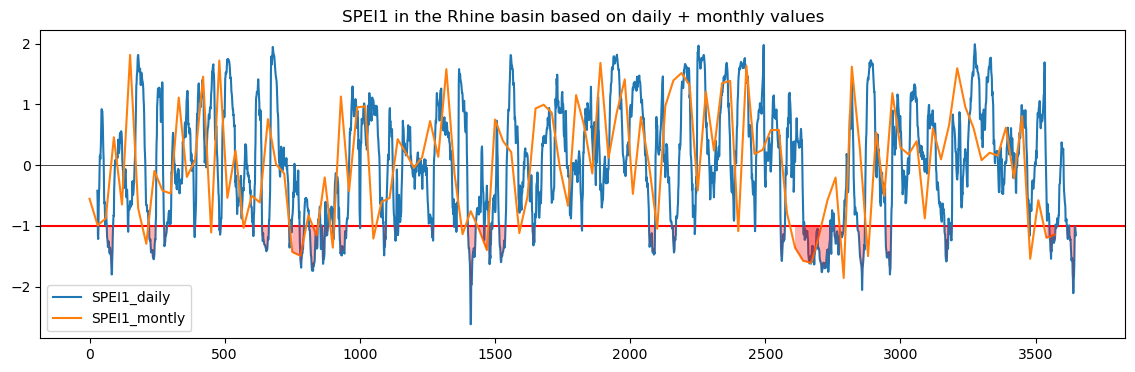

In [92]:
fig,ax = plt.subplots(1, 1,figsize=(14,4))

plt.axhline(y=-1, color='r', linestyle='-')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.plot(r_spei_values_day, label='SPEI1_daily')
xaxismonths = range(0,np.shape(r_spei_values_day)[0], 30)
plt.plot(xaxismonths[:-2],r_spei_values, label='SPEI1_montly')

xaxis = range(0,np.shape(r_spei_values_day)[0])
plt.fill_between(xaxis,-1,r_spei_values_day,where =  (r_spei_values_day <= -1), color='r',alpha=0.3,linewidth=0,zorder=5)

xaxis = range(0,np.shape(r_spei_values_day)[0])
plt.fill_between(xaxismonths[:-2],-1,r_spei_values,where =  (r_spei_values <= -1), color='r',alpha=0.3,linewidth=0,zorder=5)



plt.legend()
plt.title('SPEI1 in the Rhine basin based on daily + monthly values')

In [71]:
xaxismonths = range(0,np.shape(r_spei_values_day)[0], 30)

In [72]:
np.shape(xaxismonths)

(122,)

In [77]:
np.shape(r_spei_values_day)[0]

3650

In [80]:
days_per_month = [31,28,31,30,31,30,31,31,30,31,30,31]*10

#### Have a bunch of necessary definitions

In [6]:
def open_one_LENTIS(var, freq, timeslice, i, j, diri, plev=None):
    """
    Open one LENTIS data file from the ensemle
    """
    if timeslice == 'PD': 
        letter = 'h'
    elif timeslice == '2K': 
        letter = 's'
        
    ens_member=f'{letter}{str(i).zfill(2)}{str(j)}'
    
    file=f"{diri}/{timeslice}/{freq}/{var}/{var}_{ens_member}.nc"
    
    if plev != None:
        ds=xr.open_dataset(file).sel(plev=plev)
    else:
        ds=xr.open_dataset(file)
    
    return ds.convert_calendar('noleap'), ens_member

In [7]:
def calc_boxstat(ds, var, area='global'): 
    """
    Compute spatial weighted mean
    ds      :  xarray DataArray
    """ 
    box_seasons = ds.time.dt.season

    if hasattr(ds, 'lat'):
            weights = np.cos(ds.lat * np.pi / 180)
    elif hasattr(ds, 'latitude'):
            weights = np.cos(ds.latitude * np.pi / 180)

    if area=='global':
        if hasattr(ds, 'lat'):
            boxstat = ds[var].weighted(weights).mean(dim=('lat','lon')) 
        elif hasattr(ds, 'latitude'):
            boxstat = ds[var].weighted(weights).mean(dim=('latitude','longitude')) 
    elif area=='nh':
        if hasattr(ds, 'lat'): 
            boxstat = ds[var].sel(lat=slice(0,90)).weighted(weights).mean(dim=('lat','lon')) 
        elif hasattr(ds, 'latitude'):
            boxstat = ds[var].sel(latitude=slice(0,90)).weighted(weights).mean(dim=('latitude','longitude')) 
    elif area=='europe':
        if hasattr(ds, 'lat'):
            boxstat = ds[var].sel(lat=slice(30,70),lon=slice(-10,40)).weighted(weights).mean(dim=('lat','lon')) 
        elif hasattr(ds, 'latitude'):
            boxstat = ds[var].sel(latitude=slice(30,70),longitude=slice(-10,40)).weighted(weights).mean(dim=('latitude','longitude'))  

    # regions for Pieter Slomp
    elif area in ['rhine',]:
        path_mask = '/perm/nklm/Px_drought/' + area + '.nc'
        basin_mask = xr.open_dataset(path_mask).catchmentID[0,:,:]

        if hasattr(ds, 'lat'):
            boxstat = ds[var].where(basin_mask).weighted(weights).mean(dim=('lat','lon')) 
        elif hasattr(ds, 'latitude'):
            boxstat = ds[var].where(basin_mask).weighted(weights).mean(dim=('latitude','longitude'))   
            
    # regions for Leonie Hemelrijk
    elif area=='LH_westEU':
        if hasattr(ds, 'lat'):
            boxstat = ds[var].sel(lat=slice(30,60),lon=slice(-30,30)).weighted(weights).mean(dim=('lat','lon')) 
        elif hasattr(ds, 'latitude'):
            boxstat = ds[var].sel(latitude=slice(30,60),longitude=slice(-30,30)).weighted(weights).mean(dim=('latitude','longitude'))    
    elif area=='LH_rhine':
        if hasattr(ds, 'lat'):
            boxstat = ds[var].sel(lat=slice(47,55),lon=slice(2,10)).weighted(weights).mean(dim=('lat','lon')) 
        elif hasattr(ds, 'latitude'):
            boxstat = ds[var].sel(latitude=slice(47,55),longitude=slice(2,10)).weighted(weights).mean(dim=('latitude','longitude'))

    else:
        raise ValueError('unknown area: '+area)
            
            
    return boxstat, box_seasons

In [8]:
def get_attr_info(var, freq, timeslice, diri):
    """
    
    """
    ds, ens_member = open_one_LENTIS(var, freq, timeslice, 1, 1, diri)
    
    # get global attributes
    attrs=ds.attrs
    
    # get coordinates
    time_attrs=ds.time.attrs
    lat_attrs=ds.lat.attrs
    lon_attrs=ds.lon.attrs

    # get coordinate bounds 
    time_bnds=ds.time_bnds
    lat_bnds=ds.lat_bnds
    lon_bnds=ds.lon_bnds
    
    # get part of the var attributes
    var_units=ds[var].units
    var_standard_name=ds[var].standard_name
    var_long_name=ds[var].long_name
    
    
    return attrs, time_attrs, time_bnds, var_units, var_standard_name, var_long_name

In [9]:
def calc_ens_statistics_and_to_netcdf(var, freq, timeslice, plev, diri, diro, area='global', seas='ANN', statistic='mean'):
    '''
    """Compute the annual-averaged, global weighted mean 
    for a given variable, for all ensemble members of a time slice"""
    '''
    
    # define variables of the computed quantity and its ensemble member
    ens_stat_values=[]
    ens_member_list=[]
    
    # Do the calculation
    for i in np.arange(1,16+1):
        for j in np.arange(0,9+1):
            ds, ens_member = open_one_LENTIS(var, freq, timeslice, i, j, diri, plev)
            #ds, ens_member = open_one_LENTIS(var, freq, timeslice, i, j, diri)
            boxstat,box_seasons = calc_boxstat(ds, var, area)
            seasonal_avg = calc_seasonal_avg(boxstat,box_seasons, seas)

            ens_stat_values.append(seasonal_avg)
            ens_member_list.append(ens_member)
            del ds,boxstat,seasonal_avg,ens_member

    
    # Prepare xarray.dataset to save as Netcdf file
    attrs, time_attrs, time_bnds, var_units, var_standard_name, var_long_name = get_attr_info(var,freq,timeslice, diri)
    
    # time_attrs = {'standard_name': 'time',
    #                 'long_name': 'time',
    #                 'bounds': 'time_bnds',
    #                 'axis': 'T'}
    
    time_bnds_combined, time_avg = get_avg_timebnds(var, freq, timeslice, diri, seas)
    
    ens_attrs = {'standard_name': 'ens_mem',
                 'long_name': 'Ensemble member',
                 'comment': 'Postprocessed by Laura Muntjewerf (KNMI). A time slice of KNMI-LENTIS consists of 16 ensemble member of 10 years. All simulations have a unique ensemble member label that reflects the forcing, and how the initial conditions are generated. The initial conditions have two aspects: the parent simulation from which the run is branched (macro perturbation, there are 16), and the seed relating to a particular micro-perturbation in the initial three-dimensional atmosphere temperature field (there are 10). The ensemble member label thus is a combination of: forcing (h for present-dsy/historical and s for +2K/SSP2-4.5), parent ID (number between 1 and 16), micro perturbation ID (number between 0 and 9) '}
    coords={'time': (['time'], time_avg.data, time_attrs),
            'ens': (['ens'], ens_member_list, ens_attrs)
            }
    
    var_attr = {'units': var_units, 
                        'standard_name': f'{var_standard_name}_{area}_{seas}_{statistic}',
                        'long_name': f'{statistic} {var_long_name} of {area} ({seas})'}
                    
    
    # define data with variable attributes as Xarray dataset
    ds_new = xr.Dataset(
    data_vars=dict(
        time_bnds=(["time", "bnds"], 
                     time_bnds_combined,{}),
        ens_bnds=(["ens"], 
                     ens_member_list,{}),
        var=(['ens','time'],  
                      ens_stat_values, 
                       var_attr,
    )),
    coords=coords,
    attrs=attrs,
    )
    
    # assign encoding
    # otherwise it will throw error when opening with nvciew --> (ncview: netcdf_dim_value: unknown data type (10) for dimension time) en (unknown data type (12) for dimension ens)
    ds_new.ens.encoding = {'zlib': False,
                     'shuffle': False,
                     'complevel': 0,
                     'fletcher32': False,
                     'contiguous': False,
                     'chunksizes': None,
                     'dtype': '|S1'}

    ds_new.time.encoding = {'zlib': False,
                        'shuffle': False,
                        'complevel': 0,
                        'fletcher32': False,
                        'contiguous': False,
                        'dtype': np.dtype('float64'),
                        'units': 'days since 1850-01-01 00:00:00',
                        'calendar': 'proleptic_gregorian'
                        }

    

    # create dataset
    # Save in right location
    
    if plev != None:
        filo=f'{timeslice}_ensemble_{area}_{seas}_{freq}_{var}_{plev}_mean.nc'
    else:
        filo=f'{timeslice}_ensemble_{area}_{seas}_{freq}_{var}_mean.nc'
    

    ds_new.to_netcdf(f'{diro}/{filo}', unlimited_dims='ens')
    